### 使用 HR 完成螺旋波，耦合方式使用差分法

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
from import_fun import HR, Diffusion2D

In [8]:
Nx = 200
Ny = 200
method = "euler"
dt = 0.01

In [9]:
# 生成节点，初始值设定
nodes = HR(N=Nx*Ny, method=method, dt=dt)
nodes.vars_nodes[0, :] = -1.31742
nodes.vars_nodes[1, :] = -7.67799
nodes.vars_nodes[2, :] = 1.12032

# 生成一个方阵视图，这个视图与原始数组共享内存
x_view = nodes.vars_nodes[0, :].reshape(Nx, Ny)
y_view = nodes.vars_nodes[1, :].reshape(Nx, Ny)
z_view = nodes.vars_nodes[2, :].reshape(Nx, Ny)

# 设定楔形初始值
x_view[91:93, 0:100] = 2.
y_view[91:93, 0:100] = 2.
z_view[91:93, 0:100] = -1.

x_view[94:96, 0:100] = 0.
y_view[94:96, 0:100] = 0.
z_view[94:96, 0:100] = 0.

x_view[97:99, 0:100] = -1.
y_view[97:99, 0:100] = -1.
z_view[97:99, 0:100] = 2.

nodes.params_nodes["Iex"] = 1.315
nodes.params_nodes["s"] = 3.9
nodes.spiking = False    # 关掉峰值探测器

In [10]:
# 设定扩散耦合
syn = Diffusion2D(D=2., boundary="No_flow", adjacency=4)

In [11]:
for i in range(1000_00):
    Isyn = syn(x_view)
    nodes(Isyn)

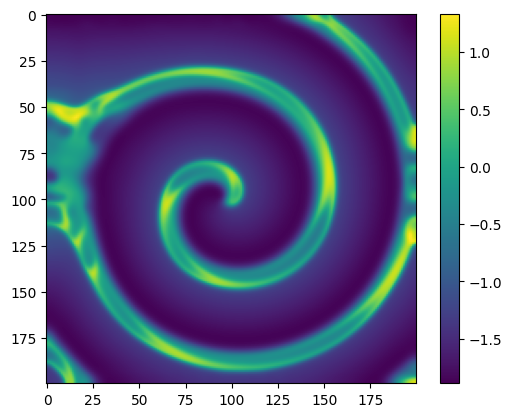

In [12]:
plt.imshow(x_view)
plt.colorbar()
plt.show()